In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv("HeartDisease.csv")
data

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [109]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

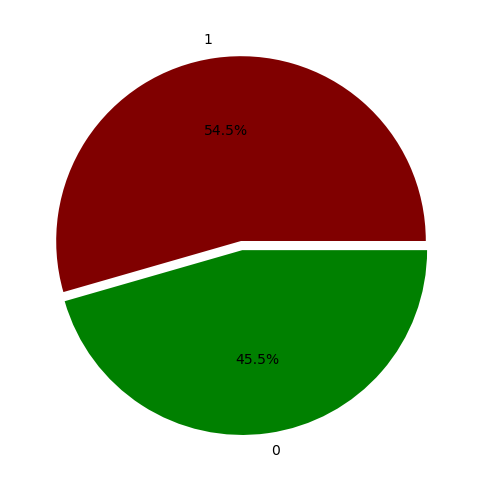

In [110]:
plt.figure(figsize=(10,6))
labels=['1','0']
explode=[0,.05]
mycolors=['maroon','green']
size=data['target'].value_counts().values
plt.pie(size,explode=explode,labels=labels,colors=mycolors,autopct="%1.1f%%")
plt.show()

# Checking for relation between numerical values 

<Axes: xlabel='cholestrol', ylabel='target'>

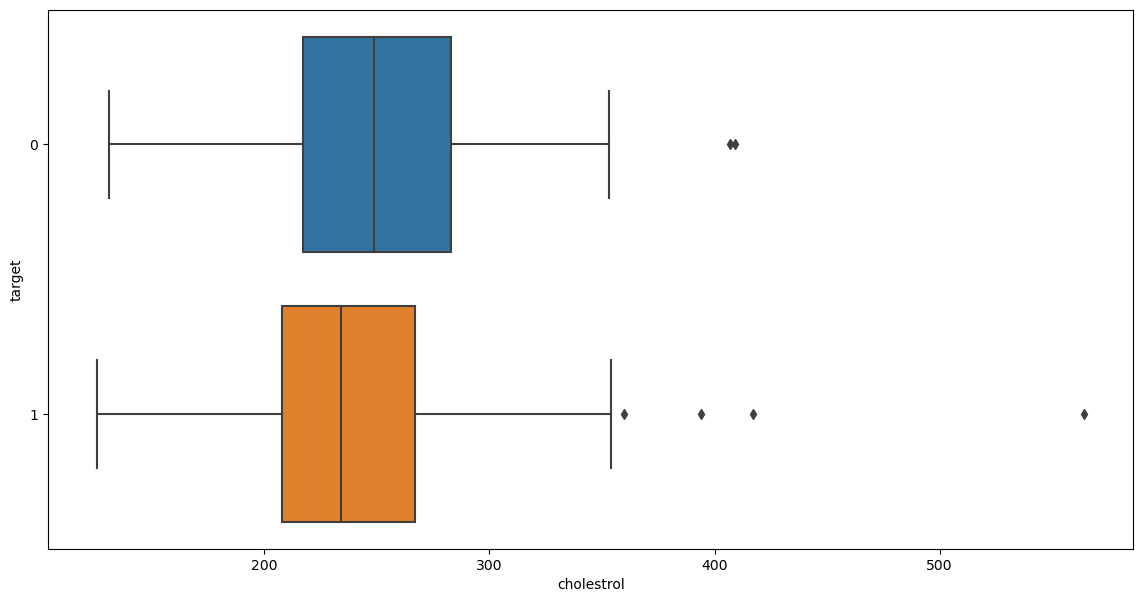

In [111]:

plt.figure(figsize=(14,7))
sns.boxplot(x=data['cholestrol'],y=data['target'],orient='h')

After viewing this graph we can say that cholestrol does not effect the target value .The person who is having cholestrol nearby 500 will definitely gets heart disease.
so cholestrol and target have no strong relation.

<Axes: xlabel='age', ylabel='target'>

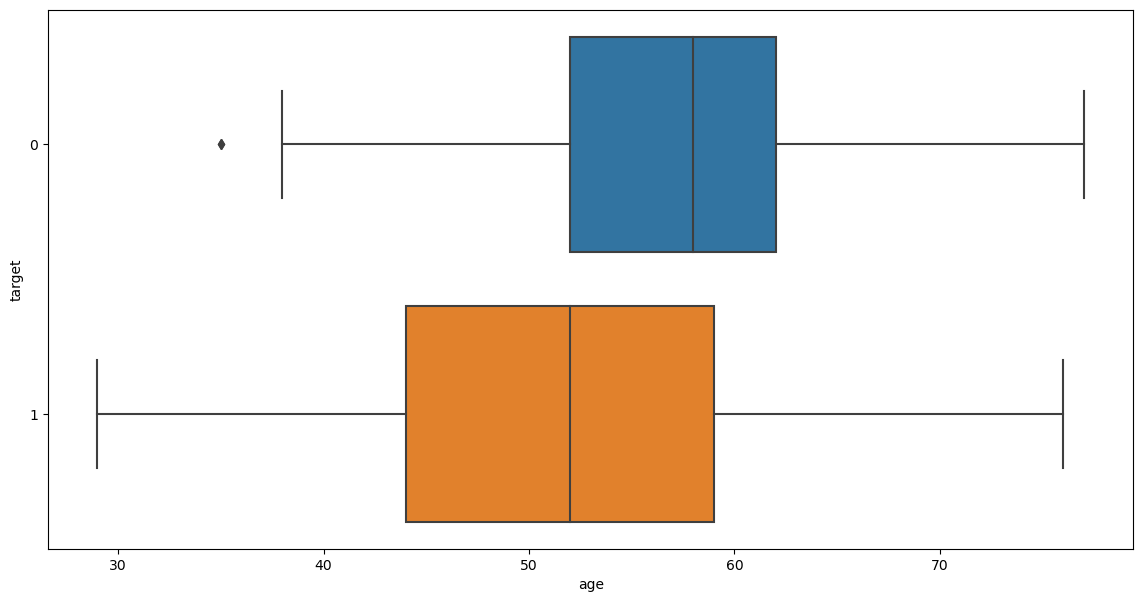

In [112]:

plt.figure(figsize=(14,7))
sns.boxplot(x=data['age'],y=data['target'],orient='h')

There is a moderate relation between age and target as the graph contains only negligible amount of outliers

<Axes: xlabel='thalach', ylabel='target'>

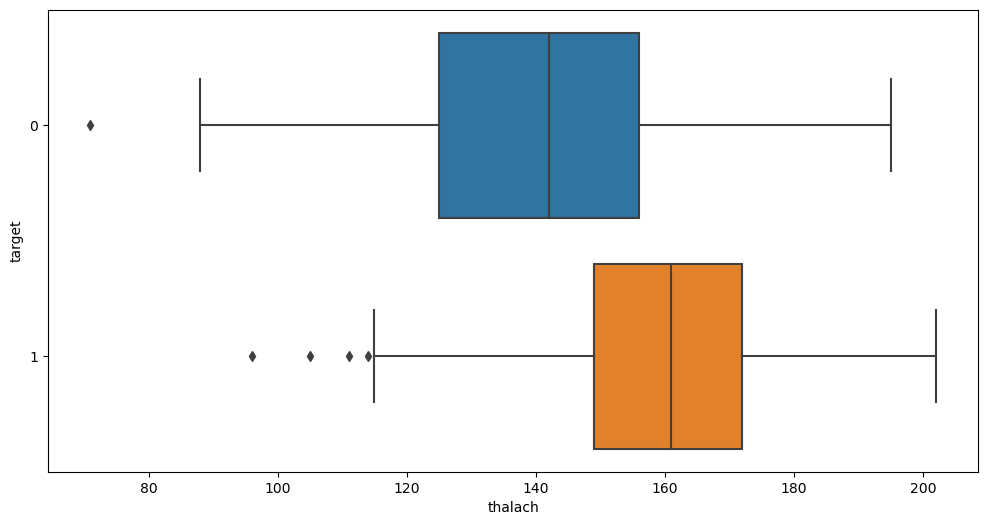

In [113]:
plt.figure(figsize=(12,6))
sns.boxplot(x = data['thalach'],y = data['target'],orient='h')

<Axes: xlabel='thalassemia', ylabel='target'>

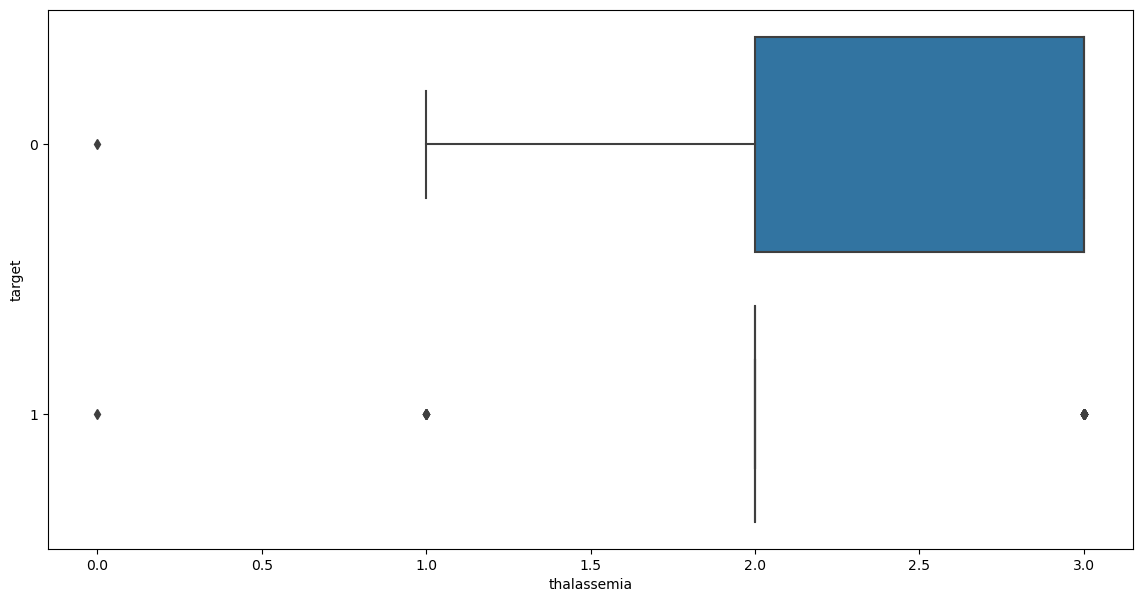

In [141]:

plt.figure(figsize=(14,7))
sns.boxplot(x=data['thalassemia'],y=data['target'],orient='h')

The graph shows that person with heart rate of less that 110 will be having heart diseases 

# Checking for outliers

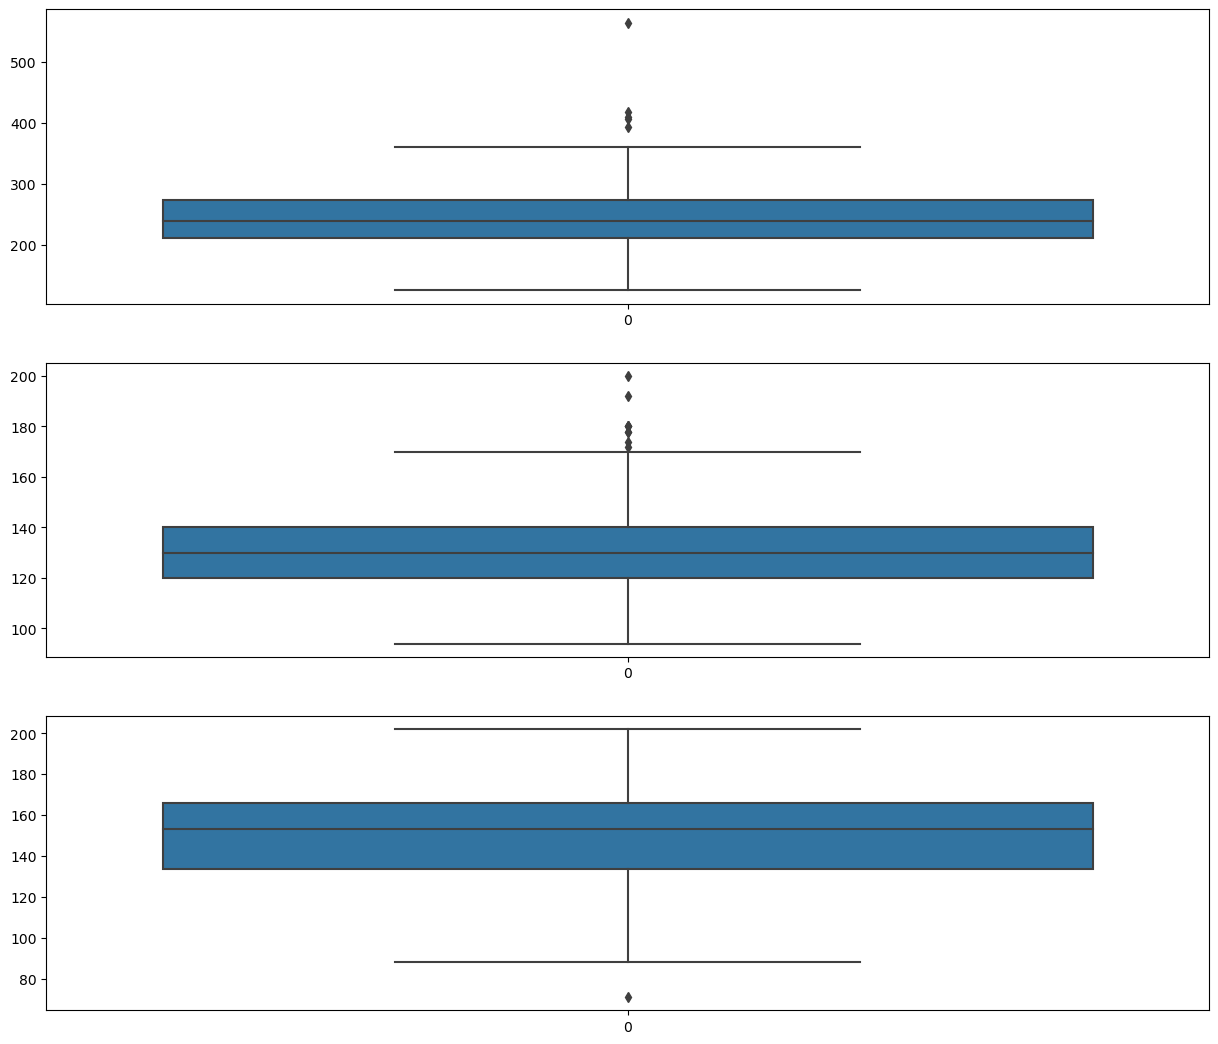

In [114]:
fig,axs = plt.subplots(3,1,figsize  =(15,13))
plt1 = sns.boxplot(data['cholestrol'],ax = axs[0])
plt1 = sns.boxplot(data['rest_bps'],ax = axs[1])
plt1 = sns.boxplot(data['thalach'],ax = axs[2])
plt.show()

So the above graphs shows that data contains negligible amount of outliers in cholestrol and resr_bps which means this data is clean and we can train our model 

In [115]:
data['cholestrol'].unique()

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

In [116]:
data1 = data.drop(['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia','target','old_peak'], axis = 1,inplace = False)
data1

,age,rest_bps,cholestrol,thalach
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
...,...,...,...,...
298,57,140,241,123
299,45,110,264,132
300,68,144,193,141
301,57,130,131,115


# Seeing relation between numerical values

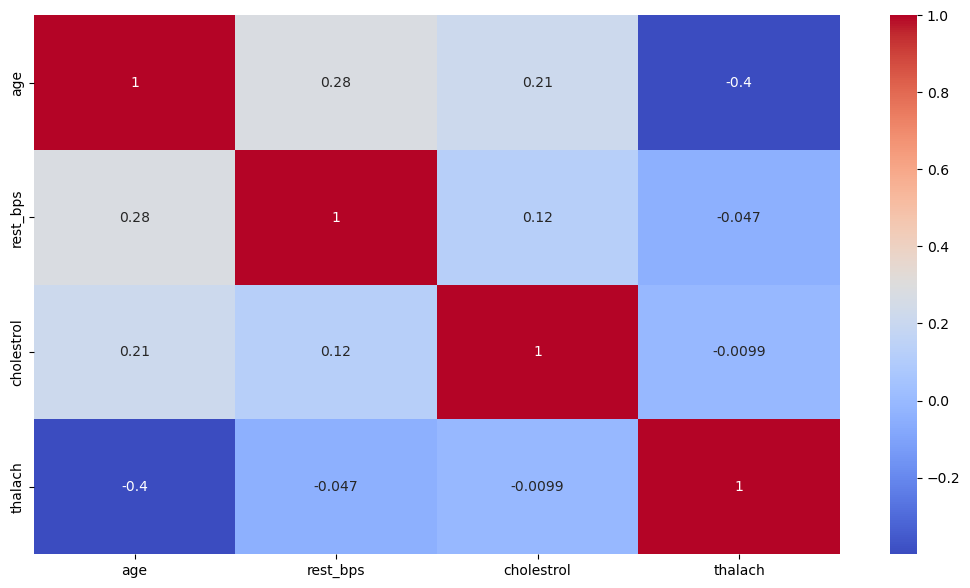

In [117]:
# Analyze the relation between these numrical columns

plt.figure(figsize = (13,7))
sns.heatmap(data1.corr(),annot = True, cmap = 'coolwarm')
plt.show()

# Feature Selection 

In [118]:
from sklearn.feature_selection import chi2
data.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [119]:
x1=data[['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia']]

y1=data['target']        

In [120]:
score = chi2(x1,y1)

In [121]:
score

(array([ 23.28662399,   7.57683451,  62.59809791,  14.8239245 ,
         23.93639448,   0.20293368,   2.97827075, 188.32047169,
         38.91437697,  72.64425301,   9.8040952 ,  66.44076512,
          5.79185297]),
 array([1.39567266e-06, 5.91231763e-03, 2.53498179e-15, 1.18028642e-04,
        9.95714828e-07, 6.52363208e-01, 8.43893904e-02, 7.39510166e-43,
        4.42807388e-10, 1.55258340e-17, 1.74123685e-03, 3.60567663e-16,
        1.61006098e-02]))

Test for independence values. null hypothesis variable are independent to each other . Alternate hypothesis variable are dependent

if the p-value is <=0.05,then we can reject the null hypothesis otherwise we need to accept it

In [122]:
p_values=pd.Series(score[1],index = x1.columns)

In [123]:
p_values

age                    1.395673e-06
gender                 5.912318e-03
chest_pain             2.534982e-15
rest_bps               1.180286e-04
cholestrol             9.957148e-07
fasting_blood_sugar    6.523632e-01
rest_ecg               8.438939e-02
thalach                7.395102e-43
exer_angina            4.428074e-10
old_peak               1.552583e-17
slope                  1.741237e-03
ca                     3.605677e-16
thalassemia            1.610061e-02
dtype: float64

In [124]:
irr_cols=[]

for x in p_values.index:
    if p_values[x] <= 0.05:
        print(x, ':- Reject Null Hypothesis')
    else:
        print(x,':- Accept the Hypothesis')
        irr_cols.append(x)

age :- Reject Null Hypothesis
gender :- Reject Null Hypothesis
chest_pain :- Reject Null Hypothesis
rest_bps :- Reject Null Hypothesis
cholestrol :- Reject Null Hypothesis
fasting_blood_sugar :- Accept the Hypothesis
rest_ecg :- Accept the Hypothesis
thalach :- Reject Null Hypothesis
exer_angina :- Reject Null Hypothesis
old_peak :- Reject Null Hypothesis
slope :- Reject Null Hypothesis
ca :- Reject Null Hypothesis
thalassemia :- Reject Null Hypothesis


In [125]:
irr_cols

['fasting_blood_sugar', 'rest_ecg']

In [126]:
data.drop(labels = irr_cols, axis = 1,inplace = True)

In [127]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


In [128]:
x = data.drop('target', axis = 1)
y = data['target']

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=32)


In [130]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 11), (61, 11), (242,), (61,))

# Model Building

In [131]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [132]:
pred = dt.predict(x_test)

In [133]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score, classification_report,confusion_matrix

In [134]:
print("Accuracy Score",accuracy_score(y_test,pred))
print("F1 Score",f1_score(y_test,pred))
print("Auc Score",roc_auc_score(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score 0.7868852459016393
F1 Score 0.7936507936507936
Auc Score 0.7865591397849462
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.78      0.81      0.79        31

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



# Hyper Parameter tunning

In [137]:
data_tune= DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_split=35)

In [138]:
data_tune.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=35)

In [139]:
pred_t=data_tune.predict(x_test)

In [140]:
print("Accuracy Score",accuracy_score(y_test,pred_t))
print("F1 Score",f1_score(y_test,pred_t))
print("Auc Score",roc_auc_score(y_test,pred_t))
print(classification_report(y_test,pred_t))

Accuracy Score 0.8032786885245902
F1 Score 0.8285714285714285
Auc Score 0.8010752688172044
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        30
           1       0.74      0.94      0.83        31

    accuracy                           0.80        61
   macro avg       0.83      0.80      0.80        61
weighted avg       0.82      0.80      0.80        61

